# Análise sobre dados do CEAP

Fonte: https://www12.senado.leg.br/transparencia/dados-abertos-transparencia/dados-abertos-ceaps

No momento em que esta pesquisa está sendo feita, o ano de 2022 ainda não se encerrou, portanto os gastos deste ano ainda não estão completos.

**Última atualização:** 11/08/2022

### Instalação de bibliotecas

In [ ]:
# versão do matplotlib 3.4.0 ou superior
!pip install matplotlib==3.4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Tratamento e Limpeza de dados (2022)

### Primeira visualização do arquivo

In [ ]:
import pandas as pd

In [ ]:
ceaps_2022 = pd.read_csv('https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2022.csv', encoding = 'latin-1', sep = ";", nrows = 3)
ceaps_2022.head()

ULTIMA ATUALIZACAO  \
ANO  MES SENADOR      TIPO_DESPESA                                       CNPJ_CPF           FORNECEDOR                    DOCUMENTO         DATA       DETALHAMENTO                                        VALOR_REEMBOLSADO   
2022 1   ACIR GURGACZ Aluguel de imóveis para escritório político, co... 004.948.028-63     GILBERTO PISELO DO NASCIMENTO 001/22            03/01/2022 Despesa com pagamento de aluguel de imóvel para...               6000   
                      Divulgação da atividade parlamentar                26.320.603/0001-64 INFORMANAHORA                 000000000000310/A 04/01/2022 Despesa com divulgação da atividade parlamentar...               1500   

                                                                                                                                                                                                          18/08/2022 02:01  
ANO  MES SENADOR      TIPO_DESPESA                                       CNPJ_CPF           FORNECEDOR                    DOCUMENTO         DATA       DETALHAMENTO                                          COD_DOCUMENTO  
2022 1   ACIR GURGACZ Aluguel de imóveis para escritório político, co... 004.948.028-63     GILBERTO PISELO DO NASCIMENTO 001/22            03/01/2022 Despesa com pagamento de aluguel de imóvel para...          2173614  
                      Divulgação da atividade parlamentar                26.320.603/0001-64 INFORMANAHORA                 000000000000310/A 04/01/2022 Despesa com divulgação da atividade parlamentar...          2173615

In [ ]:
ceaps_2022.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3 entries, ('ANO', 'MES', 'SENADOR', 'TIPO_DESPESA', 'CNPJ_CPF', 'FORNECEDOR', 'DOCUMENTO', 'DATA', 'DETALHAMENTO') to ('2022', '1', 'ACIR GURGACZ', 'Divulgação da atividade parlamentar', '26.320.603/0001-64', 'INFORMANAHORA', '000000000000310/A', '04/01/2022', 'Despesa com divulgação da atividade parlamentar no website www.informanahora.com')
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ULTIMA ATUALIZACAO  3 non-null      object
 1   18/08/2022 02:01    3 non-null      object
dtypes: object(2)
memory usage: 1.4+ KB


* O arquivo começa com a data da última atualização, isso faz com que hajam apenas duas colunas e que algumas linhas de valor igual se agrupem na tabela.

## Extração da data da última atualização

In [ ]:
# Convertendo uma string em datetime
# Referência: https://www.alura.com.br/artigos/lidando-com-datas-e-horarios-no-python?gclid=Cj0KCQjw-daUBhCIARIsALbkjSZTiCmktYTMVezV0Ubq_ONo5bJ7O6QuNcoXBGSD3yH7n0x46v89QDIaAtBbEALw_wcB

from datetime import datetime

In [ ]:
atualizacao_texto = pd.read_csv('https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2022.csv', encoding = 'latin-1', sep = ";", nrows = 0)
atualizacao_texto.columns[1]

'18/08/2022 02:01'

In [ ]:
atualizacao_texto = atualizacao_texto.columns[1]
ultima_atualizacao_2022 = datetime.strptime(atualizacao_texto, '%d/%m/%Y %H:%M')
print("Última atualização do dataset (2022) " + str(ultima_atualizacao_2022))

Última atualização do dataset (2022) 2022-08-18 02:01:00


## Abertura do dataset

In [ ]:
# O header = 1 faz com que o arquivo seja lido a partir da segunda linha, ignorando a primeira e evitando o problema do multi index

ceaps_2022 = pd.read_csv('https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2022.csv', encoding = "latin-1", sep = ";", header = 1, decimal = ",")
ceaps_2022.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2022,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/22,03/01/2022,Despesa com pagamento de aluguel de imóvel par...,6000.0,2173614
1,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,26.320.603/0001-64,INFORMANAHORA,000000000000310/A,04/01/2022,Despesa com divulgação da atividade parlamenta...,1500.0,2173615
2,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,13.659.201/0001-47,LINHA PURPURA FOTO E VIDEO LTDA,107,14/01/2022,Despesa com produção de texto e edição de víde...,6000.0,2173616
3,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,23.652.846/0001-01,ROBERTO GUTIERREZ DA ROCHA M.E.I.,187,18/01/2022,Divulgação da atividade parlamentar,1000.0,2173618
4,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,08.941.827/0001-01,RONDONIA DINÂMICA COM. E SERV. DE INFORMÁTICA ...,000000000001772/A,17/01/2022,Divulgação da atividade parlamentar,2000.0,2173617


In [ ]:
ceaps_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9984 entries, 0 to 9983
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ANO                9984 non-null   int64  
 1   MES                9984 non-null   int64  
 2   SENADOR            9984 non-null   object 
 3   TIPO_DESPESA       9984 non-null   object 
 4   CNPJ_CPF           9984 non-null   object 
 5   FORNECEDOR         9984 non-null   object 
 6   DOCUMENTO          9458 non-null   object 
 7   DATA               9984 non-null   object 
 8   DETALHAMENTO       5276 non-null   object 
 9   VALOR_REEMBOLSADO  9984 non-null   float64
 10  COD_DOCUMENTO      9984 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 858.1+ KB


* Os campos ANO, MES, SENADOR, TIPO_DESPESA, CNPJ_CPF, FORNECEDOR, DATA, VALOR_REEMBOLSADO, COD_DOCUMENTO estão preenchidos, mas não necessariamente possuem valores válidos.

* Os campos DOCUMENTO e DETALHAMENTO possuem células nulas. 

* Todos os nomes são de senadores reais.

# União dos dados de 2011 a 2022 e Tratamentos

* Optei por não utilizar os dados desde o início do CEAPS (2008) porque o período 2008-2010 não abrange um mandato presidencial completo.

## Abertura dos datasets

In [ ]:
def extrai_dados(caminho):
  atualizacao_texto = pd.read_csv(caminho, encoding = "latin-1", sep = ";", nrows = 0)
  atualizacao_texto = atualizacao_texto.columns[1]
  ultima_atualizacao = datetime.strptime(atualizacao_texto, '%d/%m/%Y %H:%M')

  dados = pd.read_csv(caminho, decimal = ',', encoding = 'latin-1', sep = ';', header = 1)

  return ultima_atualizacao, dados

In [ ]:
# 2022 a 2019
ultima_atualizacao_2022, ceaps_2022 = extrai_dados('https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2022.csv')
ultima_atualizacao_2021, ceaps_2021 = extrai_dados('https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2021.csv')
ultima_atualizacao_2020, ceaps_2020 = extrai_dados('https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2020.csv')
ultima_atualizacao_2019, ceaps_2019 = extrai_dados('https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2019.csv')

print("Última atualização de 2022 " + str(ultima_atualizacao_2022))
print("Última atualização de 2021 " + str(ultima_atualizacao_2021))
print("Última atualização de 2020 " + str(ultima_atualizacao_2020))
print("Última atualização de 2019 " + str(ultima_atualizacao_2019))

KeyboardInterrupt: ignored

In [ ]:
# 2018 a 2015
ultima_atualizacao_2018, ceaps_2018 = extrai_dados('https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2018.csv')
ultima_atualizacao_2017, ceaps_2017 = extrai_dados('https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2017.csv')
ultima_atualizacao_2016, ceaps_2016 = extrai_dados('https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2016.csv')
ultima_atualizacao_2015, ceaps_2015 = extrai_dados('https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2015.csv')

print("Última atualização de 2018 " + str(ultima_atualizacao_2018))
print("Última atualização de 2017 " + str(ultima_atualizacao_2017))
print("Última atualização de 2016 " + str(ultima_atualizacao_2016))
print("Última atualização de 2015 " + str(ultima_atualizacao_2015))

In [ ]:
# 2014 a 2011
ultima_atualizacao_2014, ceaps_2014 = extrai_dados('https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2014.csv')
ultima_atualizacao_2013, ceaps_2013 = extrai_dados('https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2013.csv')
ultima_atualizacao_2012, ceaps_2012 = extrai_dados('https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2012.csv')
ultima_atualizacao_2011, ceaps_2011 = extrai_dados('https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2011.csv')

# O arquivo de 2013 possui um campo com caracteres que atrapalham a leitura e conversão dos dados
ceaps_2013['VALOR_REEMBOLSADO'] = ceaps_2013['VALOR_REEMBOLSADO'].str.replace(',', '.')
ceaps_2013['VALOR_REEMBOLSADO'] = ceaps_2013['VALOR_REEMBOLSADO'].str.replace('\n', '')
ceaps_2013['VALOR_REEMBOLSADO'] = ceaps_2013['VALOR_REEMBOLSADO'].str.replace('\r', '')
ceaps_2013['VALOR_REEMBOLSADO'] = ceaps_2013['VALOR_REEMBOLSADO'].astype('float')

print("Última atualização de 2014 " + str(ultima_atualizacao_2014))
print("Última atualização de 2013 " + str(ultima_atualizacao_2013))
print("Última atualização de 2012 " + str(ultima_atualizacao_2012))
print("Última atualização de 2011 " + str(ultima_atualizacao_2011))

In [ ]:
# 2008 a 2010
#ultima_atualizacao_2010, ceaps_2010 = extrai_dados('https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2010.csv')
#ultima_atualizacao_2009, ceaps_2009 = extrai_dados('https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2009.csv')
#ultima_atualizacao_2008, ceaps_2008 = extrai_dados('https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2008.csv')

#print("Última atualização de 2010 " + str(ultima_atualizacao_2010))
#print("Última atualização de 2009 " + str(ultima_atualizacao_2009))
#print("Última atualização de 2008 " + str(ultima_atualizacao_2008))

Todas as tabelas possuem as mesmas colunas.

In [ ]:
dados = [ceaps_2022, ceaps_2021, ceaps_2020, ceaps_2019, ceaps_2018, ceaps_2017, ceaps_2016, ceaps_2015, ceaps_2014, ceaps_2013, ceaps_2012, ceaps_2011]
dados_ceaps = pd.concat(dados)
dados_ceaps.info()

In [ ]:
dados_ceaps.isnull().any()

* As colunas ANO, MES, SENADOR, TIPO_DESPESA, CNPJ_CPF, FORNECEDOR, DATA e VALOR_REEMBOLSADO estão totalmente preenchidas.

* Há dois COD_DOCUMENTO faltando.

* Faltam dados nas colunas DOCUMENTO e DETALHAMENTO.

In [ ]:
dados_ceaps.head()

## Tratamentos

### Correção de datas

* As datas contêm muitos problemas de preenchimento, desde campos preenchidos com texto até valores muito altos ou muito baixos.

* Para evitar transtornos, passarei a considerar apenas as colunas MES e ANO, que compõem a data em que o reembolso foi requisitado, e não parecem conter erros tão aparentes. 

In [ ]:
print(dados_ceaps['MES'].unique())
print(dados_ceaps['ANO'].unique())

### Erros encontrados no preenchimento do campo DATA

#### Em duas linhas, o campo DATA foi preenchido com o que deveria estar no campo DETALHAMENTO, provavelmente um equívoco na hora de preencher o formulário.

In [ ]:
dados_ceaps['DATA'].str[6:].value_counts()

In [ ]:
index_erros = dados_ceaps['DATA'].str.contains('Aérea')
index_erros
dados_ceaps[index_erros]

In [ ]:
dados_ceaps["DATA"] = [x.replace('Companhia Aérea: AVIANCA, Localizador: ZNEU9F. Passageiros: EDUARDO ALVES DO AMORIM (Matrícula 234312, PARLAMENTAR), Voo: 6223 - ARACAJU/BRASÍLIA - 24/08/2015;', '24/08/2015') for x in dados_ceaps["DATA"]]
dados_ceaps["DATA"] = [x.replace('Companhia Aérea: TAM, Localizador: YXGDSJ. Passageiros: JOSÉ SILVIO MONTEIRO (Matrícula 188223, COMISSIONADO), Voo: 3538 - BRASÍLIA/ARACAJU - 07/08/2015;', '07/08/2015') for x in dados_ceaps["DATA"]]

* O restante dos valores das duas linhas parecem estar preenchidos com números possivelmente reais.

* Entretando, alguns dos anos fornecidos sequer estão dentro das margens aceitas pelo datetime e podem gerar erros em uma conversão direta.

#### Datas com valores muito aquém do que poderia ser possível

In [ ]:
dados_ceaps['DATA'].str[6:].value_counts()

In [ ]:
dados_ceaps['ANO_INT_TEMP'] = pd.to_numeric(dados_ceaps['DATA'].str[6:])
dados_ceaps.info()

In [ ]:
index_ano_invalido_maiores = dados_ceaps['ANO_INT_TEMP'] > 2261
dados_ceaps[index_ano_invalido_maiores]

In [ ]:
index_ano_invalido_menores = dados_ceaps['ANO_INT_TEMP'] < 1677
display(dados_ceaps[index_ano_invalido_menores])

In [ ]:
dados_ceaps[index_ano_invalido_maiores]['DETALHAMENTO'].values

In [ ]:
dados_ceaps[index_ano_invalido_menores]['DETALHAMENTO'].values

In [ ]:
dados_ceaps.drop(columns = ['ANO_INT_TEMP'], inplace = True)

* Nem todos os textos encontrados no Detalhamento indicam a data real do gasto, além de exigirem um tratamento específico linha a linha.

### Composição da data de requisição de reembolso

* Todas as datas estarão concentradas no primeiro dia do mês, a data de requisição do reembolso não está completa no dataset.

In [ ]:
dados_ceaps['MES'] = dados_ceaps['MES'].astype('str')
dados_ceaps['ANO'] = dados_ceaps['ANO'].astype('str')

dados_ceaps['DATA_REQUISICAO'] = dados_ceaps['MES'].str.zfill(2) + '/' + dados_ceaps['ANO']
dados_ceaps['DATA_REQUISICAO'] = pd.to_datetime(dados_ceaps['DATA_REQUISICAO'])

dados_ceaps['MES'] = dados_ceaps['MES'].astype('int')
dados_ceaps['ANO'] = dados_ceaps['ANO'].astype('int')

dados_ceaps.head()

In [ ]:
dados_ceaps.info()

### Tratamento de valores nulos

* Como o dataset já possui textos com acentuação, optei por não evitá-la.

In [ ]:
dados_ceaps['COD_DOCUMENTO'] = dados_ceaps['COD_DOCUMENTO'].fillna('Não informado')
dados_ceaps['DOCUMENTO'] = dados_ceaps['DOCUMENTO'].fillna('Não informado')
dados_ceaps['DETALHAMENTO'] = dados_ceaps['DETALHAMENTO'].fillna('Não informado')

In [ ]:
dados_ceaps.isnull().any()

### Verificação de valores inconsistentes de reembolso

#### Valores negativos

In [ ]:
dados_ceaps['VALOR_REEMBOLSADO'].sort_values()

* Os valores serão substituídos pelos seus módulos para evitar valores nulos.

In [ ]:
dados_ceaps['VALOR_REEMBOLSADO'] = abs(dados_ceaps['VALOR_REEMBOLSADO'])

#### Valores muito baixos ( < R$ 1,00)

In [ ]:
dados_ceaps['VALOR_REEMBOLSADO'].sort_values()

In [ ]:
dados_ceaps.query('VALOR_REEMBOLSADO < 1')

* Há muitas requisições com valores muito baixos e totalmente inconsistentes com o que foi informado no TIPO_DESPESA.

## Salvando arquivo

In [ ]:
# caminho, decimal = ',', encoding = 'latin-1', sep = ';', header = 1
dados_ceaps.to_csv('dados_ceaps_2019-2022.csv', index = False, decimal = ',', encoding = 'latin-1')

# Abrindo arquivo (iniciar daqui caso já tenha o dataset tratado)

In [1]:
# versão do matplotlib 3.4.0 ou superior
!pip install matplotlib==3.4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [134]:
import pandas as pd

dados_ceaps = pd.read_csv('/content/drive/MyDrive/Projetos/7 Days Of Code/datasets/dados_ceaps_2019-2022.csv', decimal = ',', encoding = 'latin-1')
dados_ceaps['DATA_REQUISICAO'] = pd.to_datetime(dados_ceaps['DATA_REQUISICAO'])
dados_ceaps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273778 entries, 0 to 273777
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ANO                273778 non-null  int64         
 1   MES                273778 non-null  int64         
 2   SENADOR            273778 non-null  object        
 3   TIPO_DESPESA       273778 non-null  object        
 4   CNPJ_CPF           273778 non-null  object        
 5   FORNECEDOR         273778 non-null  object        
 6   DOCUMENTO          273778 non-null  object        
 7   DATA               273778 non-null  object        
 8   DETALHAMENTO       273778 non-null  object        
 9   VALOR_REEMBOLSADO  273778 non-null  float64       
 10  COD_DOCUMENTO      273778 non-null  object        
 11  DATA_REQUISICAO    273778 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 25.1+ MB


#### Padronização dos gráficos de barras horizontais e tratamento de labels extensos

In [135]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [136]:
def corta_label(label, largura_label = 50):
  label_cortada = label
  for l in range(largura_label, len(label), largura_label):
    while label_cortada[l] != " ":
      l += 1
      if l == len(label):
        break
    label_cortada = label_cortada[:l] + "\n" + label_cortada[l:]

  return label_cortada

def formata_labels(series_labels):
  list_labels = []
  for label in series_labels.values:
    list_labels.append(corta_label(label))
  return list_labels

def plota_barras_horizontais(data, x, y, formatacao = 'nenhuma', palette = '#9aadd0', titulo = "", xlabel = "", ylabel = "", destaque = -1):
  sns.set(rc={'figure.figsize':(11, 5), 'axes.facecolor':'white', 'figure.facecolor':'white'})
  plt.figure(figsize = (12,8))

  # Cores da paleta
  if destaque != -1:
    palette = ['#cccccc' if (x < destaque) else '#9aadd0' for x in data[x]]
  else:
    palette = ['#9aadd0' for x in data[x]]

  # Formatação numérica dos labels
  if formatacao == 'milhoes':
    data_2 = data.copy()
    data_2[x] = (data_2[x]/1000000).round(2)
    ax = sns.barplot(data = data_2, x = x, y = y, palette = palette)
  else:
    ax = sns.barplot(data = data, x = x, y = y, palette = palette)

  # Formata labels extensos
  labels = formata_labels(data[y])
  ax.set_yticklabels(labels)

  ax.set_title(titulo, fontsize = 20, pad = 20, horizontalalignment = 'left', x = 0)
  ax.tick_params(axis = 'y', labelsize = 13)
  ax.tick_params(axis = 'x', labelsize = 13)
  plt.xlabel(xlabel, fontsize = 20)
  plt.ylabel(ylabel)

  ax.grid(False)
  sns.despine(bottom = True, left = True)
  ax.set(xticklabels = [])

  ax.bar_label(ax.containers[0])

  plt.show()

# Análises sobre tipos de despesas (2019-2022)

In [137]:
dados_ceaps = dados_ceaps.query('ANO >= 2019')

## Tipos de despesas

In [138]:
pd.DataFrame(dados_ceaps['TIPO_DESPESA'].value_counts()).rename(columns = {'TIPO_DESPESA':'OCORRÊNCIAS'})

,OCORRÊNCIAS
"Locomoção, hospedagem, alimentação, combustíveis e lubrificantes",22696
"Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.",13753
"Passagens aéreas, aquáticas e terrestres nacionais",13511
"Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos.",4463
Divulgação da atividade parlamentar,4088
"Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar",3696
Serviços de Segurança Privada,105



## Despesas mais recorrentes

In [139]:
recorrencia_despesas = pd.DataFrame(dados_ceaps['TIPO_DESPESA'].value_counts()).reset_index()
recorrencia_despesas.rename(columns = {'index':'Tipo de despesa', 'TIPO_DESPESA':'Ocorrências'}, inplace = True)

recorrencia_despesas

,Tipo de despesa,Ocorrências
0,"Locomoção, hospedagem, alimentação, combustíve...",22696
1,"Aluguel de imóveis para escritório político, c...",13753
2,"Passagens aéreas, aquáticas e terrestres nacio...",13511
3,Aquisição de material de consumo para uso no e...,4463
4,Divulgação da atividade parlamentar,4088
5,"Contratação de consultorias, assessorias, pesq...",3696
6,Serviços de Segurança Privada,105


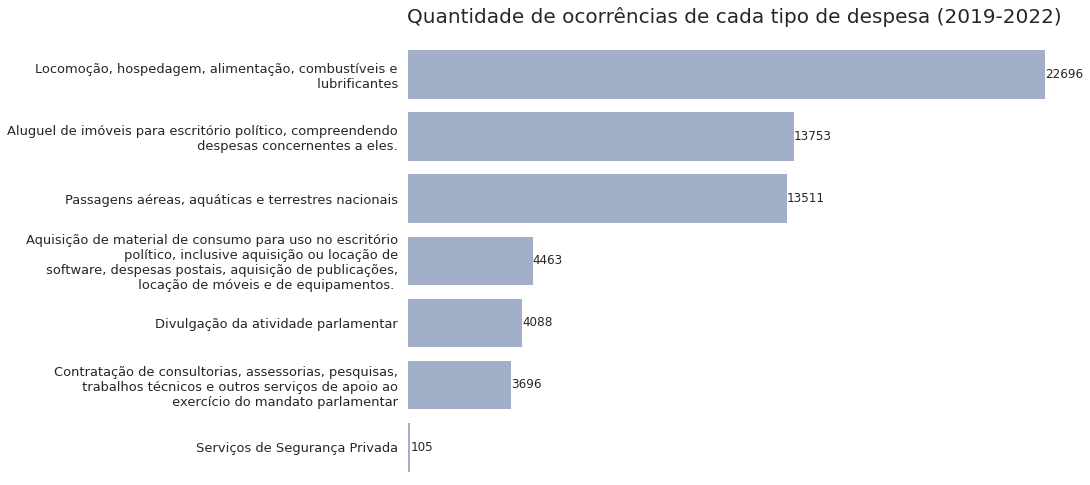

In [140]:
plota_barras_horizontais(recorrencia_despesas, x = 'Ocorrências', y = 'Tipo de despesa',
                            titulo = "Quantidade de ocorrências de cada tipo de despesa (2019-2022)")

* A primeira e a segunda despesas mais recorrentes estão relacionadas às viagens dos senadores.

## Gastos por tipo de despesa

In [141]:
total_gasto_por_despesa = dados_ceaps.groupby('TIPO_DESPESA').sum().reset_index()[["TIPO_DESPESA", "VALOR_REEMBOLSADO"]]
total_gasto_por_despesa.rename(columns = {"TIPO_DESPESA":'Tipo de despesa', "VALOR_REEMBOLSADO":'Total em reembolsos'}, inplace = True)
total_gasto_por_despesa.sort_values(by = 'Total em reembolsos', ascending = False, inplace = True)

total_gasto_por_despesa

,Tipo de despesa,Total em reembolsos
2,"Contratação de consultorias, assessorias, pesq...",21094144.20
5,"Passagens aéreas, aquáticas e terrestres nacio...",19662092.77
4,"Locomoção, hospedagem, alimentação, combustíve...",15531775.51
0,"Aluguel de imóveis para escritório político, c...",14397821.12
3,Divulgação da atividade parlamentar,11528174.32
1,Aquisição de material de consumo para uso no e...,3363897.00
6,Serviços de Segurança Privada,132898.80


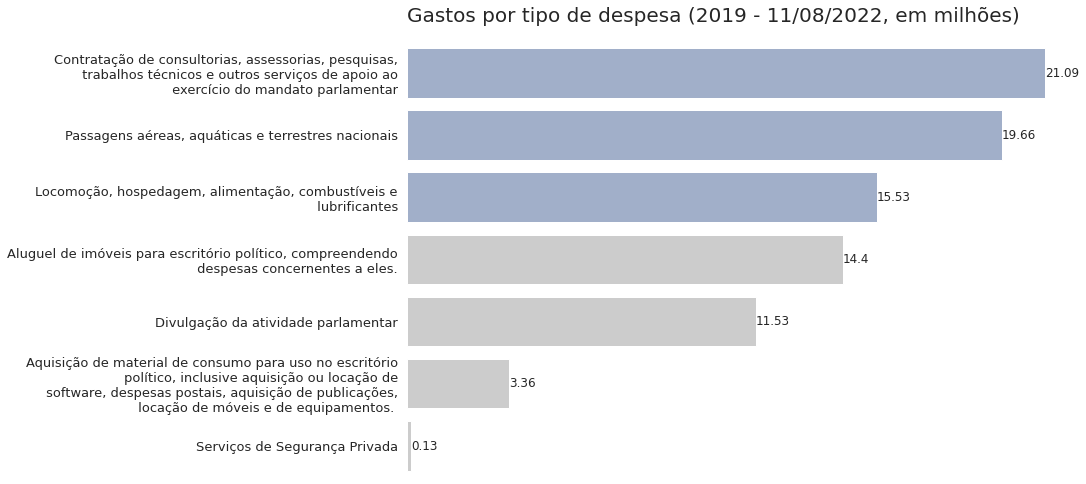

In [142]:
plota_barras_horizontais(total_gasto_por_despesa, x = 'Total em reembolsos', y = 'Tipo de despesa',
                            titulo = "Gastos por tipo de despesa (2019 - 11/08/2022, em milhões)", formatacao = 'milhoes', destaque = 15000000)

# Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar (2019 - 11/08/2022)

In [143]:
tipo_despesa = 'Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar'

### Histograma

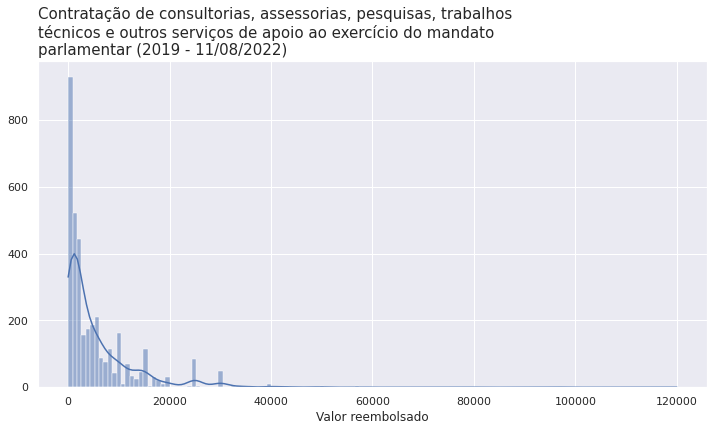

In [144]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (12,6))

ax = sns.histplot(dados_ceaps.query('TIPO_DESPESA == @tipo_despesa'), x = 'VALOR_REEMBOLSADO', kde = True)

ax.set_title(f'Contratação de consultorias, assessorias, pesquisas, trabalhos \ntécnicos e outros serviços de apoio ao exercício do mandato \nparlamentar (2019 - 11/08/2022)', 
             fontsize = 15, horizontalalignment = 'left', x = 0)
plt.xlabel('Valor reembolsado', fontsize = 12)
plt.ylabel('')

plt.show()

### Boxplot

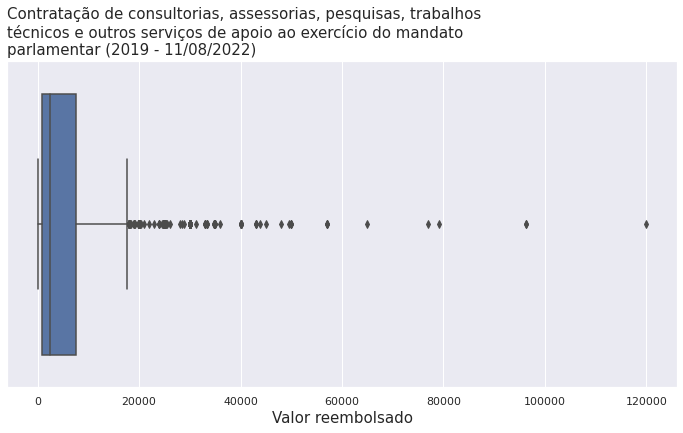

In [145]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (12,6))

ax = sns.boxplot(x = dados_ceaps.query('TIPO_DESPESA == @tipo_despesa')['VALOR_REEMBOLSADO'])

ax.set_title('Contratação de consultorias, assessorias, pesquisas, trabalhos \ntécnicos e outros serviços de apoio ao exercício do mandato \nparlamentar (2019 - 11/08/2022)', 
             fontsize = 15, horizontalalignment = 'left', x = 0)
plt.xlabel('Valor reembolsado', fontsize = 15)
plt.ylabel('')

plt.show()

### Estatíticas

In [146]:
dados_ceaps.query('TIPO_DESPESA == @tipo_despesa').describe()

,ANO,MES,VALOR_REEMBOLSADO
count,3696.000000,3696.000000,3696.000000
mean,2020.359578,6.386905,5707.290097
std,1.045011,3.425714,8080.010978
min,2019.000000,1.000000,3.560000
25%,2019.000000,3.000000,849.500000
50%,2020.000000,6.000000,2500.000000
75%,2021.000000,9.000000,7600.000000
max,2022.000000,12.000000,120000.000000


* Há uma grande quantidade de reembolsos de valores baixos, fazendo com que a distribuição de valores seja assimétrica.

* Por outro lado, há poucos reembolsos com valores muito acima da média.

### ~ Gráficos pro Readme ~

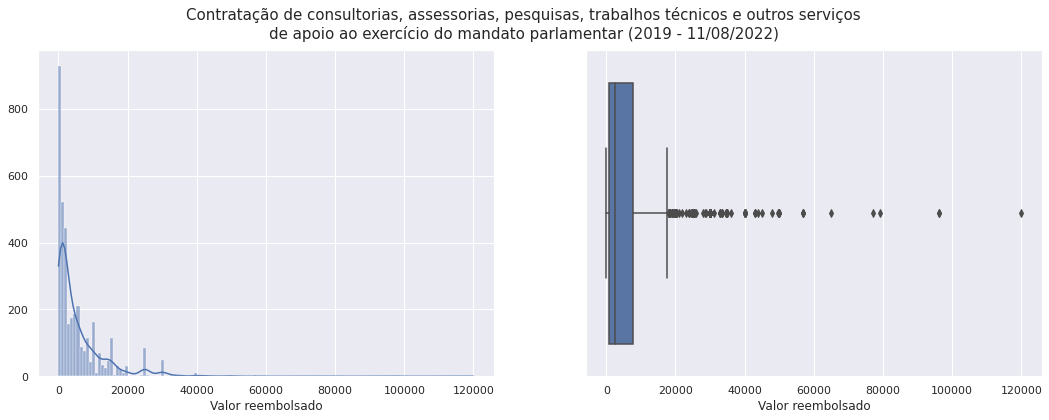

In [147]:
sns.set_theme(style="darkgrid")
fig, axs = plt.subplots(1, 2, sharex=True, figsize = (18,6))
fig.suptitle('Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços\nde apoio ao exercício do mandato parlamentar (2019 - 11/08/2022)', 
             fontsize = 15)

ax = sns.histplot(dados_ceaps.query('TIPO_DESPESA == @tipo_despesa'), x = 'VALOR_REEMBOLSADO', kde = True, ax = axs[0])
ax.set(xlabel = "Valor reembolsado", ylabel = '', )

ax = sns.boxplot(x = dados_ceaps.query('TIPO_DESPESA == @tipo_despesa')['VALOR_REEMBOLSADO'], ax = axs[1])
ax.set(xlabel = "Valor reembolsado", ylabel = '')

plt.show()

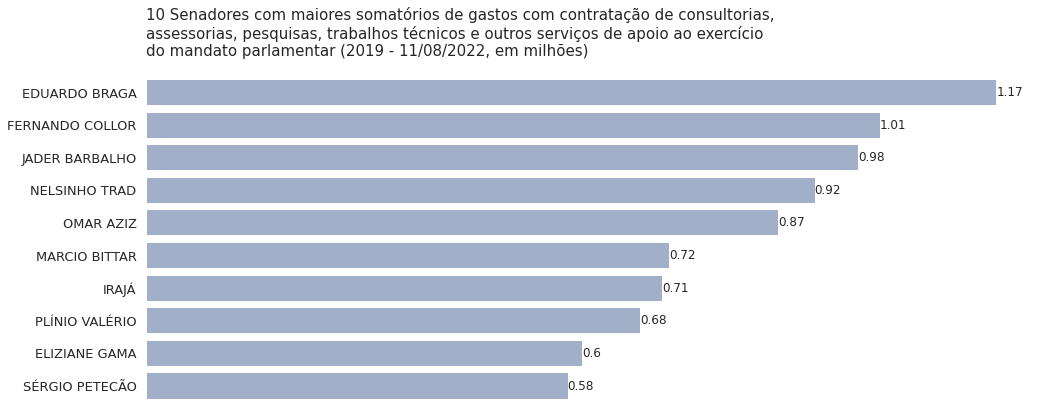

In [148]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (16,6))
paleta = ['#9aadd0' for i in range(0,10)]

dados = dados_ceaps.query('TIPO_DESPESA == @tipo_despesa').groupby('SENADOR').sum().reset_index()[['SENADOR', 'VALOR_REEMBOLSADO']]
dados['VALOR_REEMBOLSADO'] = (dados['VALOR_REEMBOLSADO']/1000000).round(2)
ax = sns.barplot(data = dados.sort_values('VALOR_REEMBOLSADO', ascending = False).head(10), x = 'VALOR_REEMBOLSADO', y = 'SENADOR', palette = paleta)

ax.set_title('10 Senadores com maiores somatórios de gastos com contratação de consultorias,\nassessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício\ndo mandato parlamentar (2019 - 11/08/2022, em milhões)', 
             fontsize = 15, pad = 20, horizontalalignment = 'left', x = 0)
ax.tick_params(axis = 'y', labelsize = 13)
plt.xlabel('')
plt.ylabel('')
ax.bar_label(ax.containers[0])
ax.set(xticklabels = [])

ax.grid(False)
sns.despine(bottom = True, left = True)

plt.show()

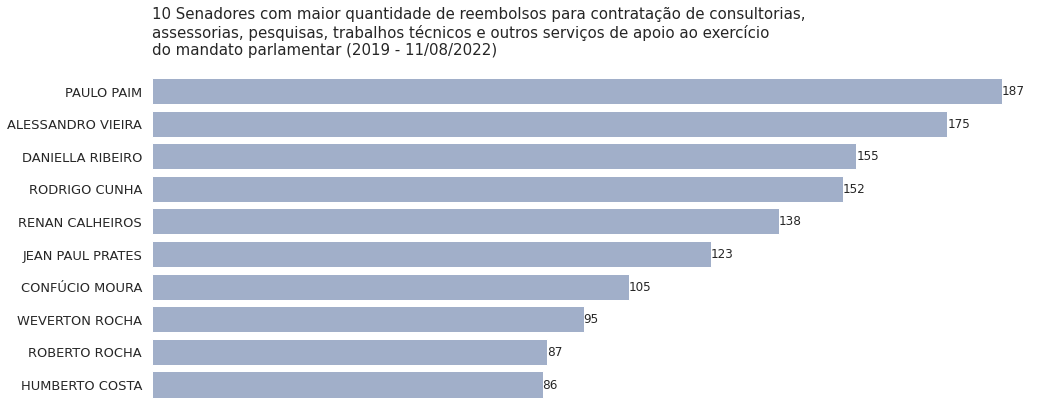

In [149]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (16,6))
paleta = ['#9aadd0' for i in range(0,10)]

dados = dados_ceaps.query('TIPO_DESPESA == @tipo_despesa').groupby('SENADOR').count().reset_index()[['SENADOR', 'VALOR_REEMBOLSADO']]
ax = sns.barplot(data = dados.sort_values('VALOR_REEMBOLSADO', ascending = False).head(10), x = 'VALOR_REEMBOLSADO', y = 'SENADOR', palette = paleta)

ax.set_title('10 Senadores com maior quantidade de reembolsos para contratação de consultorias,\nassessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício\ndo mandato parlamentar (2019 - 11/08/2022)', 
             fontsize = 15, pad = 20, horizontalalignment = 'left', x = 0)
ax.tick_params(axis = 'y', labelsize = 13)
plt.xlabel('')
plt.ylabel('')
ax.bar_label(ax.containers[0])
ax.set(xticklabels = [])

ax.grid(False)
sns.despine(bottom = True, left = True)

plt.show()

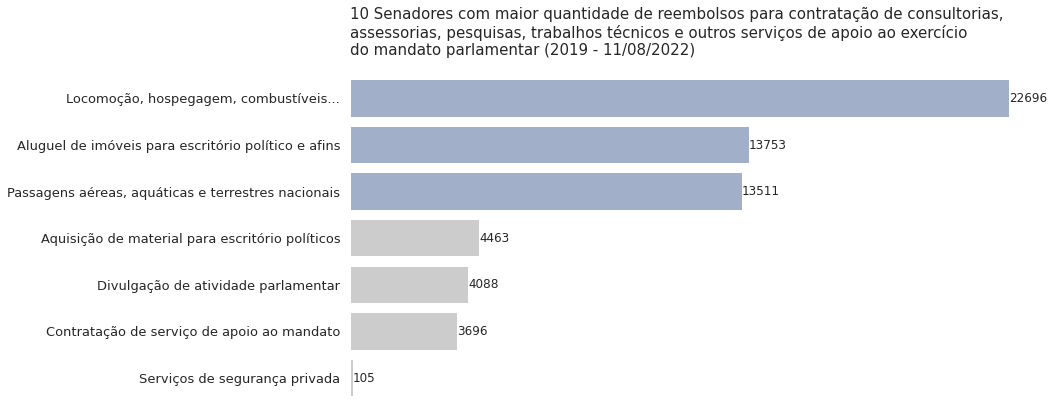

In [150]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (12.4,6))

dados = dados = dados_ceaps['TIPO_DESPESA'].value_counts().reset_index().rename(columns = {'index':'TIPO_DESPESA', 'TIPO_DESPESA':'CONTAGEM'})[['TIPO_DESPESA', 'CONTAGEM']]
palette = ['#cccccc' if (x < 10000) else '#9aadd0' for x in dados['CONTAGEM']]

ax = sns.barplot(data = dados.sort_values('CONTAGEM', ascending = False).head(10), x = 'CONTAGEM', y = 'TIPO_DESPESA', palette = palette)

labels = ['Locomoção, hospegagem, combustíveis...', 
          'Aluguel de imóveis para escritório político e afins', 
          'Passagens aéreas, aquáticas e terrestres nacionais', 
          'Aquisição de material para escritório políticos', 
          'Divulgação de atividade parlamentar', 
          'Contratação de serviço de apoio ao mandato', 
          'Serviços de segurança privada']
ax.set_yticklabels(labels)

ax.set_title('10 Senadores com maior quantidade de reembolsos para contratação de consultorias,\nassessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício\ndo mandato parlamentar (2019 - 11/08/2022)', 
             fontsize = 15, pad = 20, horizontalalignment = 'left', x = 0)
ax.tick_params(axis = 'y', labelsize = 13)
plt.xlabel('')
plt.ylabel('')
ax.bar_label(ax.containers[0])
ax.set(xticklabels = [])

ax.grid(False)
sns.despine(bottom = True, left = True)

plt.show()

## Tipo de despesa x Senadores

### Reembolsos individuais mais altos

In [151]:
dados_ceaps.query('TIPO_DESPESA == @tipo_despesa').sort_values('VALOR_REEMBOLSADO', ascending = False).head(10)[['SENADOR', 'FORNECEDOR', 'DETALHAMENTO', 'VALOR_REEMBOLSADO']]

,SENADOR,FORNECEDOR,DETALHAMENTO,VALOR_REEMBOLSADO
39850,WELLINGTON FAGUNDES,"T2 Comunicação, Video e Produções Eireli - EPP",Despesa com serviço de consultoria e assessori...,120000.0
38429,SÉRGIO PETECÃO,"Mult Graf Industria Grafica, Editira e Comerci...",Não informado,96250.0
38430,SÉRGIO PETECÃO,"Mult Graf Industria Grafica, Editira e Comerci...",Não informado,96250.0
58439,ROSE DE FREITAS,Grafitusa S/A,Não informado,79200.0
8367,SÉRGIO PETECÃO,P. H. A. RAMALHO - ME,Não informado,77012.0
24096,SÉRGIO PETECÃO,"Mult Graf Industria Grafica, Editira e Comerci...",Não informado,65000.0
58538,SÉRGIO PETECÃO,Reis Grafica e Comercio de Etiquetas Eireli ME,Não informado,57000.0
58556,SÉRGIO PETECÃO,Reis Grafica e Comercio de Etiquetas Eireli ME,Não informado,57000.0
58546,SÉRGIO PETECÃO,Reis Grafica e Comercio de Etiquetas Eireli ME,Não informado,57000.0
41352,ANGELO CORONEL,BUNKER BRAIN AUDIOVISUAL EIRELI,"Propaganda e publicidade, inclusive promoção d...",50000.0


* Dos dez reembolsos mais altos, sete pertenceram ao mesmo senador. Destes sete, nenhum teve o campo de detalhamento informado.

### Senadores que mais gastaram

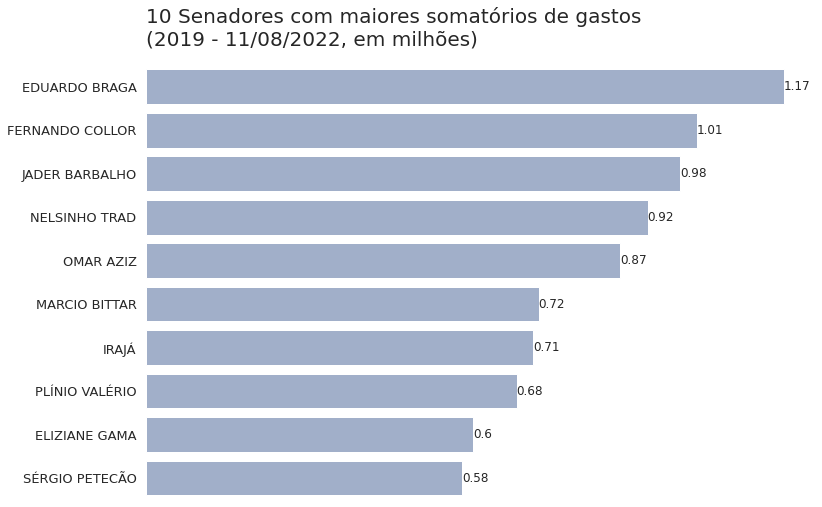

In [152]:
dados = dados_ceaps.query('TIPO_DESPESA == @tipo_despesa').groupby('SENADOR').sum().reset_index()[['SENADOR', 'VALOR_REEMBOLSADO']]
dados.sort_values('VALOR_REEMBOLSADO', ascending = False, inplace = True)

plota_barras_horizontais(dados.head(10), x = 'VALOR_REEMBOLSADO', y = 'SENADOR', formatacao = 'milhoes',
                         titulo = "10 Senadores com maiores somatórios de gastos\n(2019 - 11/08/2022, em milhões)")

* O senador mais observado na tabela anterior está em décimo dentre os senadores com maiores somatórios de gastos.

### Senadores com mais requisições de reembolso

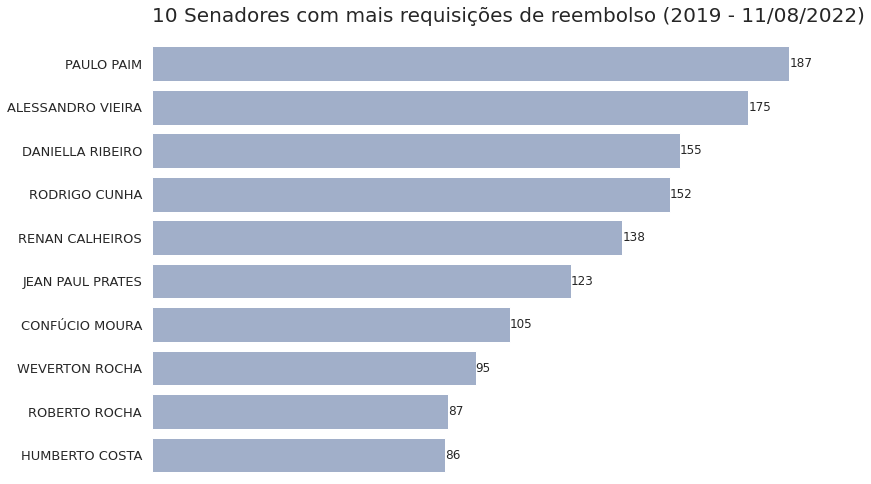

In [153]:
dados = dados_ceaps.query('TIPO_DESPESA == @tipo_despesa').groupby('SENADOR').count().reset_index()[['SENADOR', 'VALOR_REEMBOLSADO']]
dados.sort_values('VALOR_REEMBOLSADO', ascending = False, inplace = True)
dados.rename(columns = {'VALOR_REEMBOLSADO':'QUANTIDADE_REEMBOLSOS'}, inplace = True)
dados.head(10)

plota_barras_horizontais(dados.head(10), x = 'QUANTIDADE_REEMBOLSOS', y = 'SENADOR',
                         titulo = "10 Senadores com mais requisições de reembolso (2019 - 11/08/2022)")

# Passagens aéreas, aquáticas e terrestres nacionais (2019 - 11/08/2022)

In [154]:
tipo_despesa = 'Passagens aéreas, aquáticas e terrestres nacionais'

### Histograma

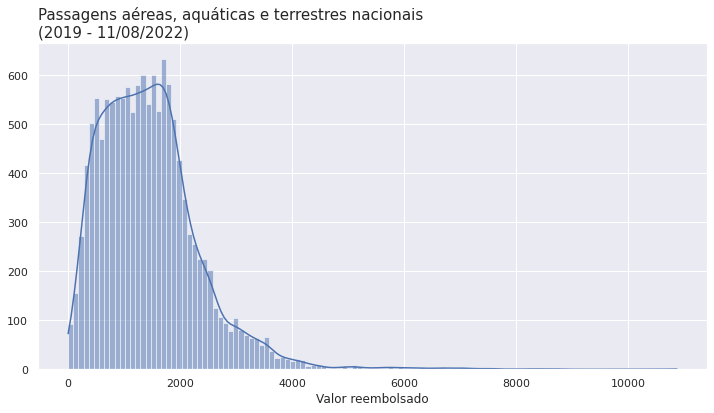

In [155]:
sns.set(rc={'figure.figsize':(11, 5)})
plt.figure(figsize = (12,6))

ax = sns.histplot(dados_ceaps.query('TIPO_DESPESA == @tipo_despesa'), x = 'VALOR_REEMBOLSADO', kde = True)

ax.set_title('Passagens aéreas, aquáticas e terrestres nacionais\n(2019 - 11/08/2022)', 
             fontsize = 15, horizontalalignment = 'left', x = 0)
plt.xlabel('Valor reembolsado', fontsize = 12)
plt.ylabel('')

plt.show()

### Boxplot

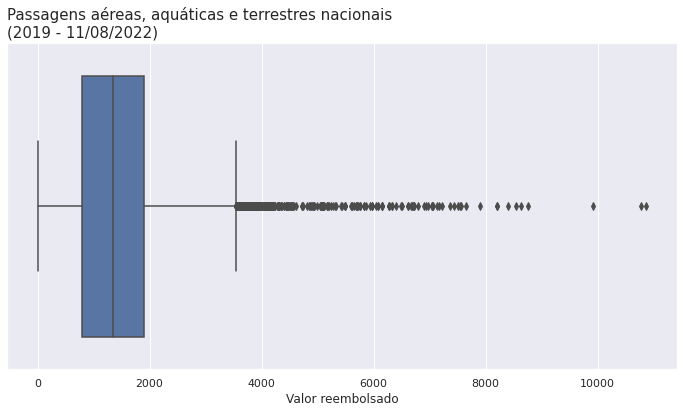

In [156]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (12,6))

ax = sns.boxplot(x = dados_ceaps.query('TIPO_DESPESA == @tipo_despesa')['VALOR_REEMBOLSADO'])

ax.set_title('Passagens aéreas, aquáticas e terrestres nacionais\n(2019 - 11/08/2022)', 
             fontsize = 15, horizontalalignment = 'left', x = 0)
plt.xlabel('Valor reembolsado', fontsize = 12)
plt.ylabel('')

plt.show()

### Estatísticas

In [157]:
dados_ceaps.query('TIPO_DESPESA == @tipo_despesa').describe()

,ANO,MES,VALOR_REEMBOLSADO
count,13511.000000,13511.000000,13511.000000
mean,2020.131745,6.442750,1455.265544
std,1.126016,3.358468,911.985862
min,2019.000000,1.000000,0.010000
25%,2019.000000,3.000000,796.020000
50%,2020.000000,6.000000,1352.840000
75%,2021.000000,9.000000,1894.080000
max,2022.000000,12.000000,10871.780000


## Tipo de despesa x Senadores

### Reembolsos individuais mais altos

In [158]:
dados_ceaps.query('TIPO_DESPESA == @tipo_despesa').sort_values('VALOR_REEMBOLSADO', ascending = False).head(10)[['SENADOR', 'FORNECEDOR', 'DETALHAMENTO', 'VALOR_REEMBOLSADO']]

,SENADOR,FORNECEDOR,DETALHAMENTO,VALOR_REEMBOLSADO
7005,OMAR AZIZ,GOL,"Companhia Aérea: GOL, Localizador: RLOSVA. Pas...",10871.78
6075,LUIS CARLOS HEINZE,LM TURISMO,"Companhia Aérea: LATAM, Localizador: ZDVTAP. P...",10783.86
6174,MAILZA GOMES,GOL,"Companhia Aérea: GOL, Localizador: QBBVME. Pas...",9924.36
196,ALESSANDRO VIEIRA,MM TOUR,"Companhia Aérea: LATAM, Localizador: KPLZIT. P...",8750.19
3619,FLÁVIO BOLSONARO,TAM,"Companhia Aérea: TAM, Localizador: VBTOJC. Pas...",8629.76
21483,OMAR AZIZ,LATAM,"Companhia Aérea: LATAM, Localizador: ARWVPF. P...",8543.38
21467,OMAR AZIZ,LATAM,"Companhia Aérea: LATAM, Localizador: SXBGUR. P...",8406.38
21481,OMAR AZIZ,LATAM,"Companhia Aérea: LATAM, Localizador: DPAPWD. P...",8207.74
36086,OMAR AZIZ,LATAM,"Companhia Aérea: LATAM, Localizador: CHBWIR. P...",8204.08
21463,OMAR AZIZ,LATAM,"Companhia Aérea: LATAM, Localizador: JYBJRN. P...",7906.38


* Dos dez reembolsos mais altos, seis pertenceram ao mesmo senador.

### Senadores que mais gastaram

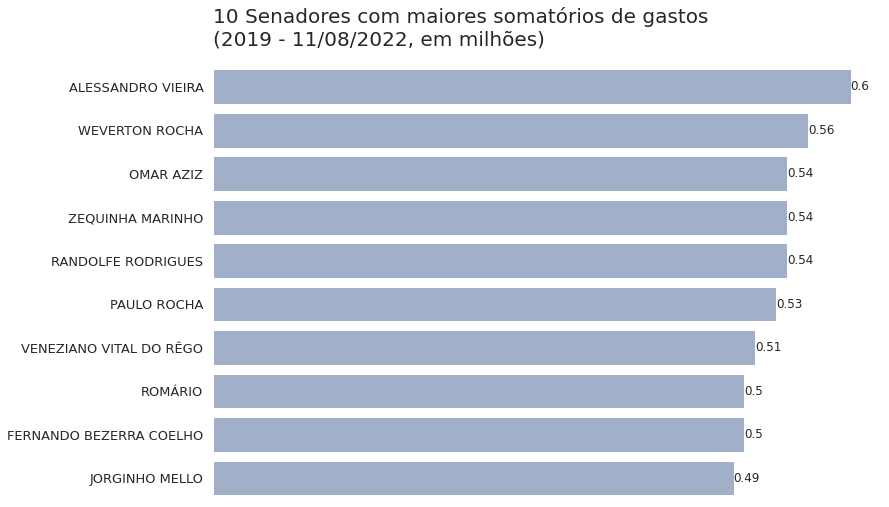

In [159]:
dados = dados_ceaps.query('TIPO_DESPESA == @tipo_despesa').groupby('SENADOR').sum().reset_index()[['SENADOR', 'VALOR_REEMBOLSADO']]
dados.sort_values('VALOR_REEMBOLSADO', ascending = False, inplace = True)

plota_barras_horizontais(dados.head(10), x = 'VALOR_REEMBOLSADO', y = 'SENADOR', formatacao = 'milhoes',
                         titulo = "10 Senadores com maiores somatórios de gastos\n(2019 - 11/08/2022, em milhões)")

* O senador mais observado na tabela anterior está em terceiro dentre os senadores com maiores somatórios de gastos.

### Senadores com mais requisições de reembolso

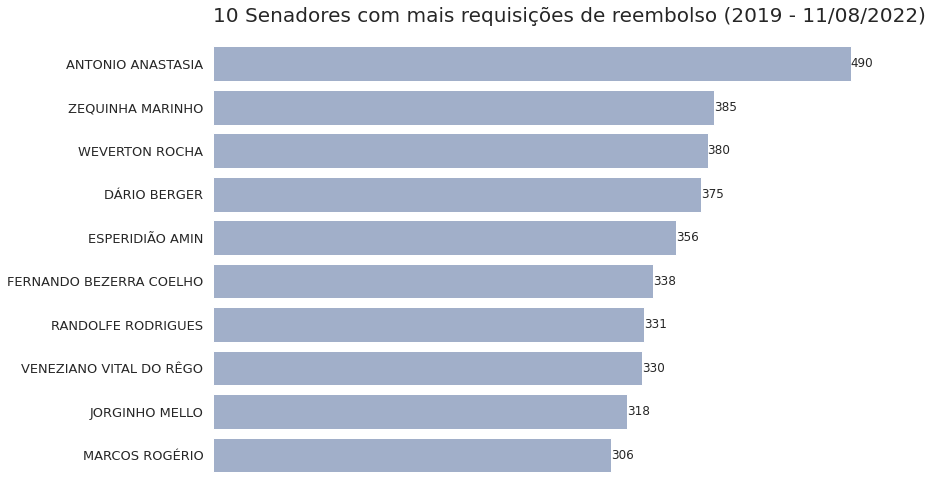

In [160]:
dados = dados_ceaps.query('TIPO_DESPESA == @tipo_despesa').groupby('SENADOR').count().reset_index()[['SENADOR', 'VALOR_REEMBOLSADO']]
dados.sort_values('VALOR_REEMBOLSADO', ascending = False, inplace = True)
dados.rename(columns = {'VALOR_REEMBOLSADO':'QUANTIDADE_REEMBOLSOS'}, inplace = True)
dados.head(10)

plota_barras_horizontais(dados.head(10), x = 'QUANTIDADE_REEMBOLSOS', y = 'SENADOR',
                         titulo = "10 Senadores com mais requisições de reembolso (2019 - 11/08/2022)")

### Requisições de baixo custo

**Reembolsos com valor menor ou igual a R$ 1,00**

In [161]:
dados_ceaps.query('TIPO_DESPESA == @tipo_despesa and VALOR_REEMBOLSADO <= 1').shape[0]

20

In [162]:
dados_ceaps.query('TIPO_DESPESA == @tipo_despesa and VALOR_REEMBOLSADO <= 1')['DETALHAMENTO']

615      Companhia Aérea: AZUL, Localizador: MGMLGZ. Pa...
1686     Companhia Aérea: LATAM, Localizador: TGJGQI. P...
11212    Companhia Aérea: LATAM, Localizador: INOSTW. P...
11246    Companhia Aérea: AZUL, Localizador: YYMQTR. Pa...
11290    Companhia Aérea: AZUL, Localizador: QDNNXV. Pa...
11300    Companhia Aérea: AZUL, Localizador: YWR3JE. Pa...
11320    Companhia Aérea: AZUL, Localizador: AGKNFW. Pa...
12996    Companhia Aérea: GOL, Localizador: HACROG. Pas...
13048    Companhia Aérea: LATAM, Localizador: CLQRMX. P...
22010    Companhia Aérea: LATAM, Localizador: GCMUVW. P...
24866    Companhia Aérea: GOL, Localizador: WN6DFZ. Pas...
29122    Companhia Aérea: GOL, Localizador: SR6BNK. Pas...
29138    Companhia Aérea: LATAM, Localizador: XYEDKX. P...
29218    Companhia Aérea: LATAM, Localizador: RSGMOE. P...
35741    Companhia Aérea: LATAM, Localizador: DBUGTJ. P...
43973    Companhia Aérea: GOL, Localizador: KLR5TJ. Pas...
44295    Companhia Aérea: LATAM, Localizador: QMFMWB. P.

* As passagens com valores mais baixos poderiam ser terrestres ou aquáticas, mas o detalhamento mostra que o gasto seria com companhia aéreas, o que parece um equívoco.

In [163]:
dados_ceaps.query('TIPO_DESPESA == @tipo_despesa and not DETALHAMENTO.str.contains("Aérea")', engine = 'python').describe()

,ANO,MES,VALOR_REEMBOLSADO
count,78.000000,78.000000,78.000000
mean,2019.948718,6.243590,136.786410
std,1.067798,3.240113,103.523062
min,2019.000000,1.000000,10.920000
25%,2019.000000,4.000000,76.000000
50%,2020.000000,6.000000,124.905000
75%,2021.000000,9.000000,179.780000
max,2022.000000,12.000000,648.120000


* Passagens aéras com valores menores que a passagem não aérea mais barata dificilmente seriam dados reais, indicando possível equívoco na requisição do reembolso.

* Considerando este tipo de equívoco como possível em todas as entradas, e também que o valor repassado aos senadores foi exatamente o que consta no CEAPS, optei por não removê-los.

# Locomoção, hospedagem, alimentação, combustíveis e lubrificantes (2019 - 11/08/2022)

In [164]:
tipo_despesa = 'Locomoção, hospedagem, alimentação, combustíveis e lubrificantes'

### Histograma

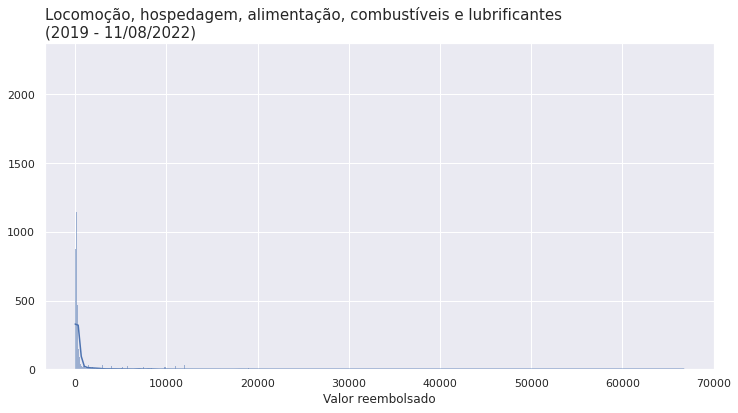

In [165]:
sns.set(rc={'figure.figsize':(11, 5)})
plt.figure(figsize = (12,6))

ax = sns.histplot(dados_ceaps.query('TIPO_DESPESA == @tipo_despesa'), x = 'VALOR_REEMBOLSADO', kde = True)

ax.set_title('Locomoção, hospedagem, alimentação, combustíveis e lubrificantes\n(2019 - 11/08/2022)', 
             fontsize = 15, horizontalalignment = 'left', x = 0)
plt.xlabel('Valor reembolsado', fontsize = 12)
plt.ylabel('')

plt.show()

* Há muitas requisições com valores "baixos" e algumas com valores muito acima da média.

* O eixo vertical deste histograma ficou com uma amplitude muito maior do que os eixos dos dois histogramas anteriores.

### Boxplot

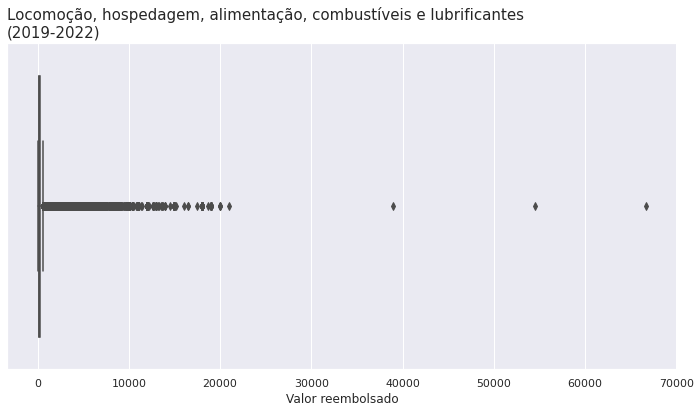

In [166]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (12,6))

ax = sns.boxplot(x = dados_ceaps.query('TIPO_DESPESA == @tipo_despesa')['VALOR_REEMBOLSADO'])

ax.set_title('Locomoção, hospedagem, alimentação, combustíveis e lubrificantes\n(2019-2022)', 
             fontsize = 15, horizontalalignment = 'left', x = 0)
plt.xlabel('Valor reembolsado', fontsize = 12)
plt.ylabel('')

plt.show()

### Estatísticas

In [167]:
dados_ceaps.query('TIPO_DESPESA == @tipo_despesa').describe()

,ANO,MES,VALOR_REEMBOLSADO
count,22696.000000,22696.000000,22696.000000
mean,2020.224489,6.228895,684.339774
std,1.129454,3.306572,1936.229655
min,2019.000000,1.000000,0.030000
25%,2019.000000,3.000000,100.000000
50%,2020.000000,6.000000,180.050000
75%,2021.000000,9.000000,300.097500
max,2022.000000,12.000000,66730.000000


* Novamente, há valores muito baixos (3 centavos).
* Até 75% das requisições, os valores são iguais ou abaixo de R$300,00, abaixo da média.

## Tipo de despesa x Senadores

### Reembolsos individuais mais altos

In [168]:
dados_ceaps.query('TIPO_DESPESA == @tipo_despesa').sort_values('VALOR_REEMBOLSADO', ascending = False).head(10)[['SENADOR', 'FORNECEDOR', 'DETALHAMENTO', 'VALOR_REEMBOLSADO']]

,SENADOR,FORNECEDOR,DETALHAMENTO,VALOR_REEMBOLSADO
44306,DAVI ALCOLUMBRE,AEROTOP TÁXI AÉREO LTDA - EPP,Não informado,66730.0
12095,CID GOMES,TAM Aviação Executiva e Taxi Aéreo,Não informado,54552.0
24089,SÉRGIO PETECÃO,ORTIZ TAXI AEREO LTDA,Não informado,39000.0
31968,JAQUES WAGNER,IDEALCAR LOCAÇÃO DE VEICULOS E TRANSPORTES LTDA.,LOCAÇÃO DE AUTOMÓVEIS.,21000.0
59231,TELMÁRIO MOTA,MARINES CAMPOS FEITOSA,Não informado,20000.0
59323,TELMÁRIO MOTA,MARINES CAMPOS FEITOSA,Não informado,20000.0
59270,TELMÁRIO MOTA,MARINES CAMPOS FEITOSA,Não informado,20000.0
35818,MECIAS DE JESUS,PARIMA LOCAÇÃO BOA VISTA LTDA,Não informado,19000.0
35813,MECIAS DE JESUS,PARIMA LOCAÇÃO BOA VISTA LTDA,Não informado,19000.0
54798,MECIAS DE JESUS,PARIMA LOCAÇÃO BOA VISTA LTDA,Não informado,19000.0


* Os três gastos individuais mais altos foram com serviço de táxi aéreo.
* Dentre os 10 gastos mas altos, dois senadores requisitaram três reembolsos com exatamente o mesmo valor.

### Senadores que mais gastaram

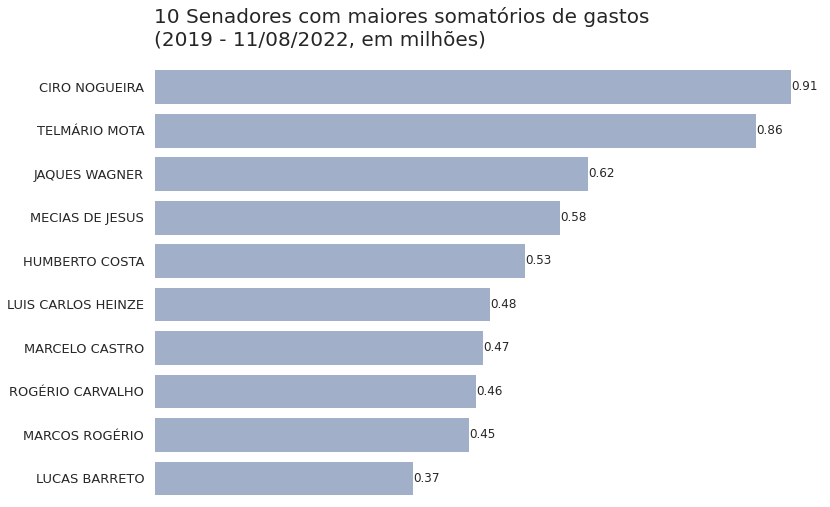

In [169]:
dados = dados_ceaps.query('TIPO_DESPESA == @tipo_despesa').groupby('SENADOR').sum().reset_index()[['SENADOR', 'VALOR_REEMBOLSADO']]
dados.sort_values('VALOR_REEMBOLSADO', ascending = False, inplace = True)

plota_barras_horizontais(dados.head(10), x = 'VALOR_REEMBOLSADO', y = 'SENADOR', formatacao = 'milhoes',
                         titulo = "10 Senadores com maiores somatórios de gastos\n(2019 - 11/08/2022, em milhões)")

* Os dois senadores com mais requisições observados na tabela anterior estão em dentre os senadores que mais gastaram neste período, na 2ª e 4ª posições.

### Senadores com mais requisições de reembolso

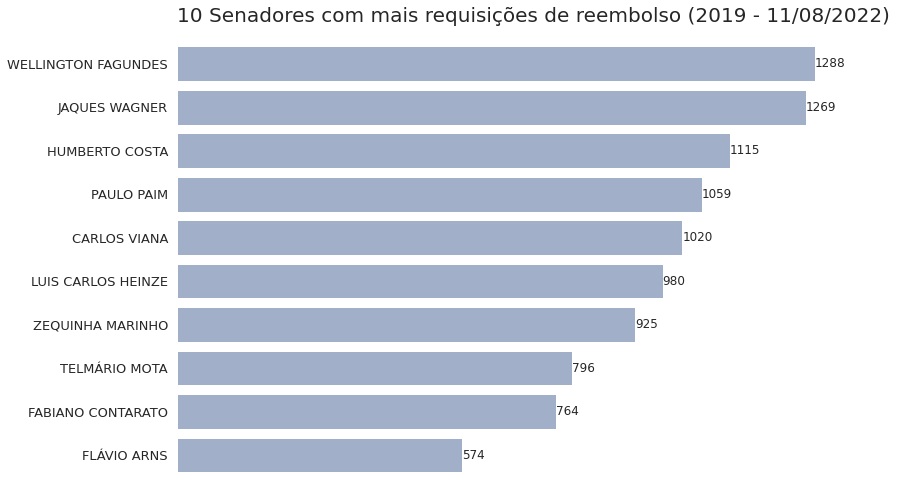

In [170]:
dados = dados_ceaps.query('TIPO_DESPESA == @tipo_despesa').groupby('SENADOR').count().reset_index()[['SENADOR', 'VALOR_REEMBOLSADO']]
dados.sort_values('VALOR_REEMBOLSADO', ascending = False, inplace = True)
dados.rename(columns = {'VALOR_REEMBOLSADO':'QUANTIDADE_REEMBOLSOS'}, inplace = True)
dados.head(10)

plota_barras_horizontais(dados.head(10), x = 'QUANTIDADE_REEMBOLSOS', y = 'SENADOR',
                         titulo = "10 Senadores com mais requisições de reembolso (2019 - 11/08/2022)")

### Requisições de baixo custo

Requisições com valores menores ou iguais a R$ 1,00

In [171]:
dados_ceaps.query('TIPO_DESPESA == @tipo_despesa and VALOR_REEMBOLSADO <= 3')[['SENADOR', 'FORNECEDOR', 'DETALHAMENTO', 'VALOR_REEMBOLSADO']]

,SENADOR,FORNECEDOR,DETALHAMENTO,VALOR_REEMBOLSADO
5028,JEAN PAUL PRATES,ASSU COMERCIAL DE PETROLEO EIRELLI,Não informado,0.03
13329,EDUARDO GOMES,AUTO POSTO CINCO ESTRELAS LTDA.,DESPESA COM COMBUSTÍVEL QUE SERVE O SENADOR ED...,0.40
28513,CIRO NOGUEIRA,Auto Posto Viracopos de Campinas Ltda,Combustível,0.03
28515,CIRO NOGUEIRA,Camelo Buffet e Delivery EIRELI,Alimentação,0.30
39297,VANDERLAN CARDOSO,VALPOSTO COMBUSTIVEIS LTDA,Não informado,0.12
40490,ZEQUINHA MARINHO,AUTO POSTO TIMBOTEUA LTDA.,Não informado,0.06
42180,CARLOS VIANA,POSTO SAGRADA FAMILIA EIRELI,Veículo abastecido pelo servidor Mauro Antonio...,0.06
48999,JEAN PAUL PRATES,Parelhas Gas LTDA,Não informado,0.17
51805,LUIS CARLOS HEINZE,EXECUTIVUS CRUZ ALTA HOTEL LTDA,AGUA.,3.00
59425,TELMÁRIO MOTA,HOTEL CRISTAL LTDA-ME,Não informado,0.04


* 5 dos 10 valores iguais ou abaiso de R$ 3,00 não possuem detalhamento.
* Há três entradas com detalhamentos relacionados a combustível cujo valor dificilmente está correto.


# Análise por senador

In [172]:
gasto_por_senador = dados_ceaps.groupby('SENADOR').sum().reset_index().sort_values('VALOR_REEMBOLSADO', ascending = False)[['SENADOR', 'VALOR_REEMBOLSADO']]
gasto_por_senador.head()

,SENADOR,VALOR_REEMBOLSADO
129,TELMÁRIO MOTA,1751791.01
119,ROGÉRIO CARVALHO,1737209.94
104,PAULO ROCHA,1708695.68
93,MECIAS DE JESUS,1692953.11
82,MAILZA GOMES,1618026.06


## Senadores que mais gastaram

In [173]:
gasto_por_senador['VALOR_REEMBOLSADO'] = (gasto_por_senador['VALOR_REEMBOLSADO'] / 1000000).round(2)

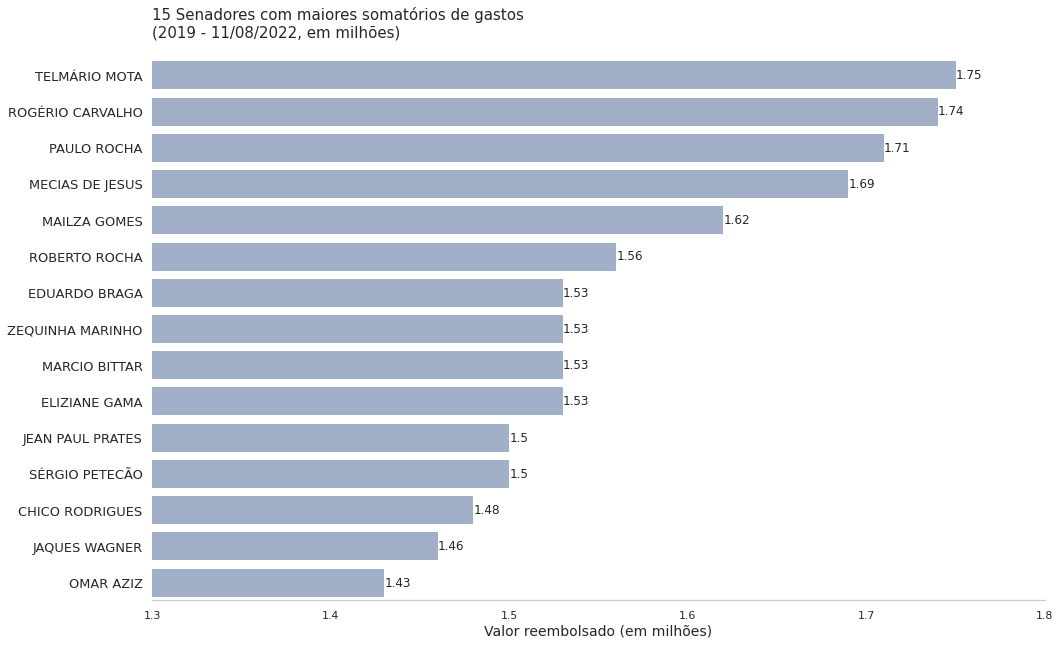

In [174]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (16,10))
palette = ['#9aadd0' for i in range(0,15)]

ax = sns.barplot(data = gasto_por_senador.head(15), x = 'VALOR_REEMBOLSADO', y = 'SENADOR', palette = palette)

ax.set_title('15 Senadores com maiores somatórios de gastos\n(2019 - 11/08/2022, em milhões)', fontsize = 15, pad = 20, ha = 'left', x = 0)
ax.tick_params(axis = 'y', labelsize = 13)
ax.bar_label(ax.containers[0])
plt.xlabel('Valor reembolsado (em milhões)', size = 14)
plt.ylabel('')
ax.set(xlim = (1.3, 1.8))

ax.grid(False)
sns.despine(bottom = False, left = True)

plt.show()

# Gastos ao longo do tempo

## 2019 a julho/2022

In [175]:
gasto_por_mes_ano = dados_ceaps.groupby(['ANO','MES']).sum().reset_index()
gasto_por_mes_ano['VALOR_REEMBOLSADO'] = gasto_por_mes_ano['VALOR_REEMBOLSADO'] / 1000000

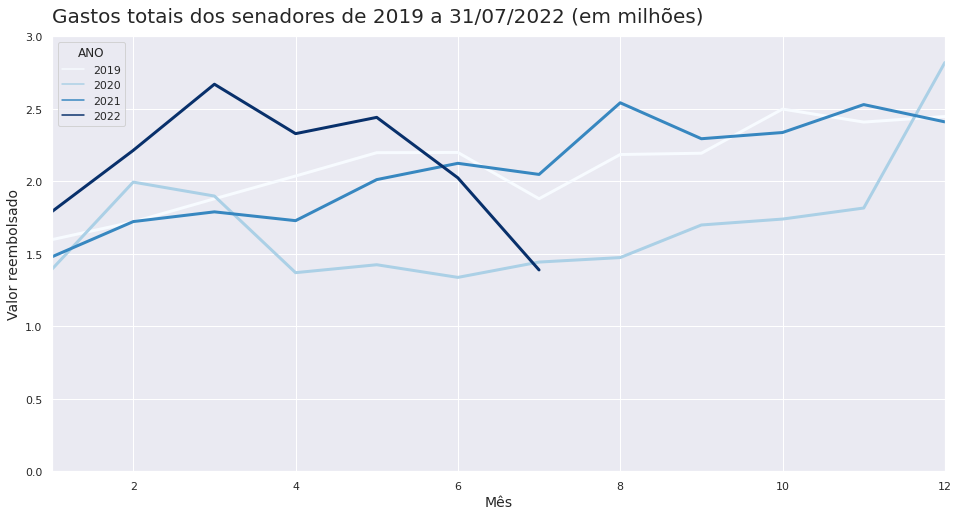

In [176]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (16,8))

ax = sns.lineplot(data = gasto_por_mes_ano[:-1], x = 'MES', y = 'VALOR_REEMBOLSADO', hue = 'ANO', 
                  palette = 'Blues', lw = 3)

ax.set_title('Gastos totais dos senadores de 2019 a 31/07/2022 (em milhões)', size = 20, pad = 15, ha = 'left', x = 0)
plt.ylabel('Valor reembolsado', size = 14)
plt.xlabel('Mês', size = 14)

ax.set(xlim = (1, 12))
ax.set(ylim = (0, 3))

plt.show()

* Agosto de 2022 ainda não está com os gastos completos, o que faria com que a linha mais escura tivesse uma queda brusca. Por isso, optei por desconsiderar este último mês.

* Em 2022, os gastos dos senadores foramm mais altos até maio, depois tiveram uma queda brusca. Isso pode estar relacionado tanto à inflação quanto à proximidade das eleições, que ocorrerão em outubro.

## 2011 a julho/2022

In [177]:
dados_ceaps_2011_2022 = pd.read_csv('/content/drive/MyDrive/Projetos/7 Days Of Code/datasets/dados_ceaps_2019-2022.csv', decimal = ',', encoding = 'latin-1')
dados_ceaps_2011_2022['DATA_REQUISICAO'] = pd.to_datetime(dados_ceaps_2011_2022['DATA_REQUISICAO'])

In [178]:
gasto_por_mes_ano = dados_ceaps_2011_2022.groupby(['ANO','MES']).sum().reset_index()
gasto_por_mes_ano['VALOR_REEMBOLSADO'] = gasto_por_mes_ano['VALOR_REEMBOLSADO'] / 1000000

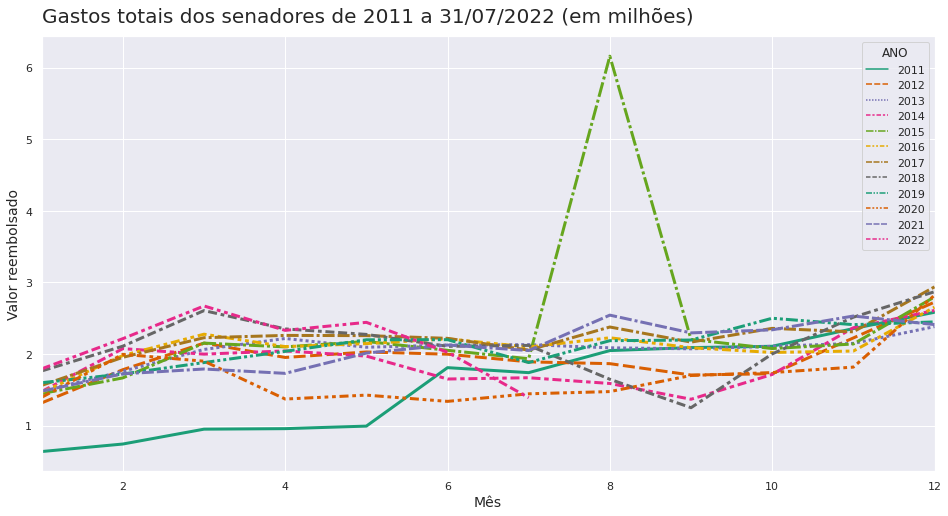

In [179]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (16,8))

ax = sns.lineplot(data = gasto_por_mes_ano[:-1], x = 'MES', y = 'VALOR_REEMBOLSADO', hue = 'ANO', 
                  palette = 'Dark2', lw = 3, style = 'ANO')

ax.set_title('Gastos totais dos senadores de 2011 a 31/07/2022 (em milhões)', size = 20, pad = 15, ha = 'left', x = 0)
plt.ylabel('Valor reembolsado', size = 14)
plt.xlabel('Mês', size = 14)

ax.set(xlim = (1, 12))
ax.set()

plt.show()

* Observa-se um pico de mais de 6 milhões de reais em agosto de 2015.

In [180]:
gasto_por_mes_ano.sort_values('VALOR_REEMBOLSADO', ascending = False).head(5)

,ANO,MES,VALOR_REEMBOLSADO
55,2015,8,6.159168
83,2017,12,2.936753
95,2018,12,2.869180
119,2020,12,2.819990
59,2015,12,2.796284


* Dentre os meses com maiores gastos, com exceção do primeiro, o valor reembolsado está abaixo de 3 milhões.

* É possível que haja um erro de digitação. Mas vou assumir que os valores fornecidos são exatamente os que foram reembolsados, assim como nos valores baixos.

## Pico de 08/2015

In [181]:
ceaps_agosto_2015 = dados_ceaps_2011_2022.query('ANO == 2015 and MES == 8')
ceaps_agosto_2015.sort_values('VALOR_REEMBOLSADO', ascending = False).head(5)

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO,DATA_REQUISICAO
146524,2015,8,EDUARDO AMORIM,"Passagens aéreas, aquáticas e terrestres nacio...",13.353.495/0001-84,PROPAGTUR - Propag Turismo Ltda,"¨¨SEM FATURA"";17/08/2015""",24/08/2015,"460,45",2016557.00,Não informado,2015-08-01
146517,2015,8,EDUARDO AMORIM,"Passagens aéreas, aquáticas e terrestres nacio...",13.353.495/0001-84,PROPAGTUR - Propag Turismo Ltda,"SEM FATURA"";02/08/2015""",07/08/2015,"469,53",2014675.00,Não informado,2015-08-01
157415,2015,8,OMAR AZIZ,"Contratação de consultorias, assessorias, pesq...",22.793.293/0001-44,Jefferson L R Coronel - Me,93,04/08/2015,Serviços de consultoria em comunicação e marke...,30000.00,2014476.0,2015-08-01
148006,2015,8,FERNANDO COLLOR,Serviços de Segurança Privada,04.850.792/0001-44,Citel Service,1142,01/08/2015,Não informado,26013.42,2017395.0,2015-08-01
142071,2015,8,ÂNGELA PORTELA,"Contratação de consultorias, assessorias, pesq...",13.493.554/0001-10,DELFINA ESTRATEGIA EM MARKETING E COMUNICAÇÃO ...,00000030,27/08/2015,Não informado,18000.00,2019132.0,2015-08-01


In [182]:
ceaps_agosto_2015.sort_values('VALOR_REEMBOLSADO', ascending = False)[2:]['VALOR_REEMBOLSADO'].sum()

2127935.96

* Com exceção dos dois maiores gastos, o valor reembolsado em 08/2015 seria de R$ 2.127.935,96, um somatório menor do que os meses com maiores gastos de 2011 a 2022.

* Há valores fornecidos nos detalhamentos destas duas entradas que são mais condinzentes com o tipo de despesa (pouco menos que R$ 470,00 em passangens aéreas).

* Os campos de documento também estão com problemas de preenchimento.


# Gastos em anos eleitorais

In [183]:
anos_eleitorais = [2014, 2018, 2022]
paleta = ['#5975a4' if (x in anos_eleitorais) else '#d5d5db' for x in gasto_por_mes_ano.groupby('ANO').sum().reset_index()['ANO']]

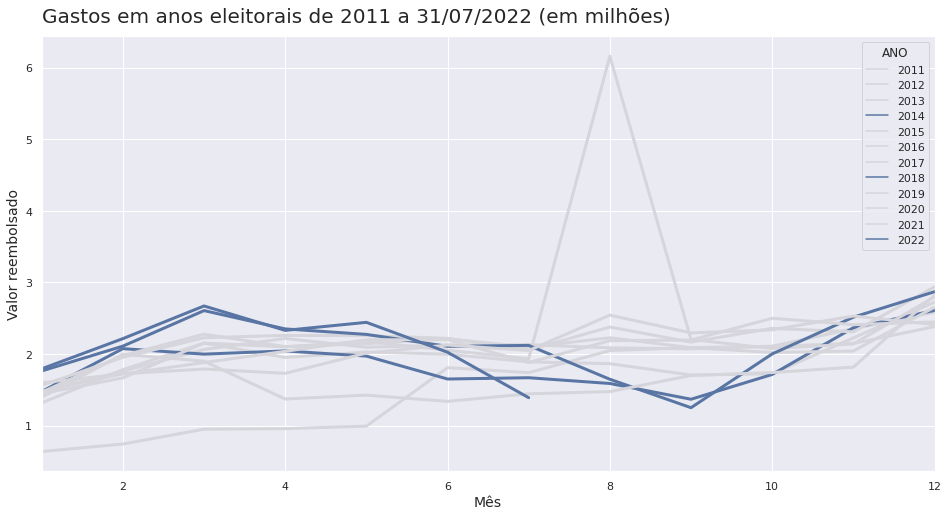

In [184]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (16,8))

ax = sns.lineplot(data = gasto_por_mes_ano[:-1], x = 'MES', y = 'VALOR_REEMBOLSADO', hue = 'ANO', 
                  palette = paleta, lw = 3)

ax.set_title('Gastos em anos eleitorais de 2011 a 31/07/2022 (em milhões)', size = 20, pad = 15, ha = 'left', x = 0)
plt.ylabel('Valor reembolsado', size = 14)
plt.xlabel('Mês', size = 14)

ax.set(xlim = (1, 12))
ax.set()

plt.show()

* Visualmente, dois dos anos eleitorais do dataset (incluindo o atual, 2022) tiveram gastos maiores até o mês de maio, e gastos mais baixos em setembro.

* Para uma afirmação mais concreta sobre as médias de gastos, são necessários testes estatísticos que considerem as taxas de inflação a cada mês e ano.